In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
data = pd.read_csv("C:/Users/madb3/Downloads/flights.csv")
data.head()

,Searched Date,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price
0,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,$83
1,2024-06-30,2024-07-16 09:34:00,2024-07-16 19:43:00,0,LAS,BOS,1,EWR,Spirit Airlines,Economy,$100
2,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1,LAS,BOS,1,ATL,Spirit Airlines,Economy,$78
3,2024-06-30,2024-07-16 08:30:00,2024-07-16 19:37:00,0,LAS,BOS,1,IAH,Spirit Airlines,Economy,$100
4,2024-06-30,2024-07-16 07:00:00,2024-07-16 16:36:00,0,LAS,BOS,1,ORD,American Airlines,Basic Economy,$148


#### Dataset Info
This dataset includes: 
Searched Date: The date the ticket was searched Departure Date: Date of the flight
Arrival Date: Date the flight arrives at destination
Flight Lands Next Day: A true/false field with 1 = Flight lands next day and 0 = Flight lands same day
Departure Airport: Abbreviation of airport of departure
Arrival Airport: Abbreviation of airport of arrival
Number of Stops: Layovers
Route: 
Airline: Name of airline
Cabin: The _____ 
Price

In [529]:
data.describe()

,Flight Lands Next Day,Number Of Stops
count,317260.000000,317260.000000
mean,0.230246,1.070144
std,0.420991,0.559399
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,3.000000


In [531]:
#Check null values
data.isna().sum()

Searched Date                0
Departure Date               0
Arrival Date                 0
Flight Lands Next Day        0
Departure Airport            0
Arrival Airport              0
Number Of Stops              0
Route                    38397
Airline                      0
Cabin                        0
Price                        0
dtype: int64

In [533]:
#Route has a bunch of null values and is also an unnecessary column considering departure and arrival airport can be used in its place

### Data Cleansing

In [536]:
#Remove unnecessary data - Search date is just the date the flight info was searched so it won't be of value
#NOTE: All of these flights are from summer 2024
df = data.drop(columns = ['Searched Date','Route','Departure Date', 'Arrival Date'])

In [538]:
df.dtypes

Flight Lands Next Day     int64
Departure Airport        object
Arrival Airport          object
Number Of Stops           int64
Airline                  object
Cabin                    object
Price                    object
dtype: object

In [540]:
#set(df['Airline'].to_list())

In [542]:
#set(df['Cabin'].to_list())

In [544]:
#set(df['Number Of Stops'].to_list())

In [546]:
#set(df['Departure Airport'].to_list())

In [548]:
#set(df['Arrival Airport'].to_list())

In [550]:
#NOTE: Our data only records travel between BOS (Boston), JFK (Queens, NY), LAS (Las Vegas), LAX (Los Angeles), ORD (Chicago), and SFO (San Francisco) airports. 

### Preprocessing

In [553]:
#Convert price to numeric

In [555]:
df["Price"] = df["Price"].replace(r"[\$,]", "", regex=True).astype(float)

In [556]:
#Handling categorical features 

In [559]:
from sklearn.preprocessing import LabelEncoder

In [561]:
#Target Encoding to retain meaningful value by using mean price for each category. 

In [563]:
#for col in ["Airline", "Cabin", "Departure Airport", "Arrival Airport"]:
    #df[col + "_encoded"] = df.groupby(col)["Price"].transform("mean")

In [565]:
#df.drop(columns=["Airline", "Cabin", "Departure Airport", "Arrival Airport"], inplace=True)

In [567]:
# Initialize the LabelEncoder
label_encoders = {}

# List of categorical columns you want to encode
categorical_cols = ["Airline", "Cabin", "Departure Airport", "Arrival Airport"]

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])  # Create a new column with encoded values
    label_encoders[col] = le  # Store the encoder for possible future use

# Check the encoded columns
print(df.head(50))

    Flight Lands Next Day Departure Airport Arrival Airport  Number Of Stops  \
0                       1               LAS             BOS                1   
1                       0               LAS             BOS                1   
2                       1               LAS             BOS                1   
3                       0               LAS             BOS                1   
4                       0               LAS             BOS                1   
5                       0               LAS             BOS                1   
6                       0               LAS             BOS                1   
7                       0               LAS             BOS                1   
8                       0               LAS             BOS                1   
9                       1               LAS             BOS                1   
10                      0               LAS             BOS                1   
11                      1               

In [569]:
#Spirit Airlines = 22
#American Airlines = 5
#United Airlines = 39
#Delta Airlines = 12
#JetBlue = 17
#Sun Country = 33

#Economy = 9
#Basic Economy = 0

#### Now that we are using relevant tables and have no null values, we must convert objects to integer values

In [573]:
print(df.columns)

Index(['Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Airline', 'Cabin', 'Price', 'Airline_encoded',
       'Cabin_encoded', 'Departure Airport_encoded',
       'Arrival Airport_encoded'],
      dtype='object')


In [575]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ["Airline", "Cabin", "Departure Airport", "Arrival Airport"]

label_encoders = {}  # Store encoders for future use

for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])  # Encode and create new columns
    label_encoders[col] = le  # Store encoder for reversing if needed

# Drop the original categorical columns
df = df.drop(columns=categorical_cols)

### Modeling

In [578]:
#from sklearn.model_selection import train_test_split

#X = df.drop(columns=["Price"]) 
#y = df["Price"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_train.shape, X_test.shape)

#### Scaling data

In [581]:
y = df["Price"]
X = df.drop(columns=["Price"]) # Now all columns should be numeric

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train model

In [584]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)

#mse = (mean_squared_error(y_test, y_pred), squared=False)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#print("MAE:", mean_absolute_error(y_test, y_pred))
#print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 37985.07136769201
R² Score: 0.18694809740660612


In [407]:
#MSE of 37985.1 suggests relatively large errors

In [409]:
#The R2 score of .1869 equals roughly 18.7%. This means that this model only explains 18.7% of variance. It should be closer to 1!

#### Feature importance

In [372]:
# Get feature importance
#feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importance
#feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
#plt.title("Feature Importance in Price Prediction")
#plt.show()

In [370]:
#Cabin appears to be the most important feature that determines price, followed by airline and number of stops

### Feature Engineering to improve model performance

In [418]:
# BRING BACK ROUTE TO DETERMINE FLIGHT DURATION

In [ ]:
# ZOOM INTO AMERICAN VS SPIRIT AIRLINES

In [ ]:
# One Hot Encoding

In [ ]:
df_with_flags = pd.get_dummies(df, columns=['Airline'], drop_first=False)

print(df_with_flags)

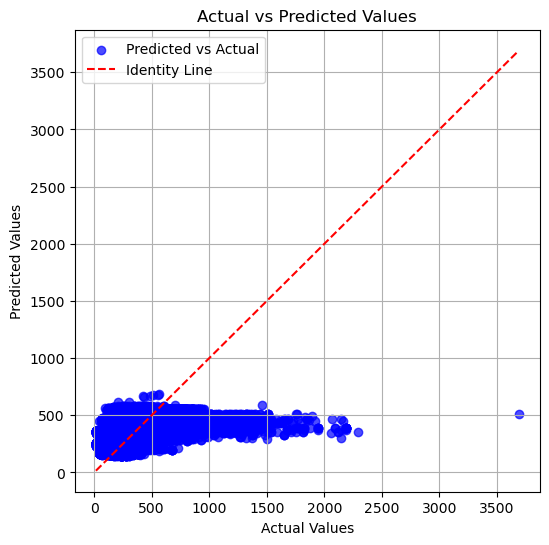

In [413]:
#y_test = Y_test 
#y_pred = Y_pred  

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual", color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Identity Line")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

plt.grid(True)
plt.legend()

plt.show()

In [415]:
y_pred = model.predict(X_test)  


rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared score


print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Linear Regression Performance:
RMSE: 930.74
MAE: 833.64
R²: -17.54


C:\Users\madb3\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
